<a href="https://colab.research.google.com/github/valenciajaime/MVMO/blob/master/Nuevos/MN2022_1_IVP_ODE__Clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación Clase

**Nombres:** 

Esteban Velilla H.

Jaime A. Valencia V.


**Email:**

esteban.velilla@udea.edu.co

jalejandro.valencia@udea.edu.co


**Curso:**
Métodos numéricos 2022-1

**Fecha:**
Martes 2022-agosto-09

# Descripción

**Objetivos**

Presentación metodos de Runge-Kutta del capitulo 5 libro guia Burden y Faires.


**Desarrollo**



1.   
2.   



# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [ ]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.7.3
Version sympy:  1.7.1


# Capitulo 5. Metodo de Euler

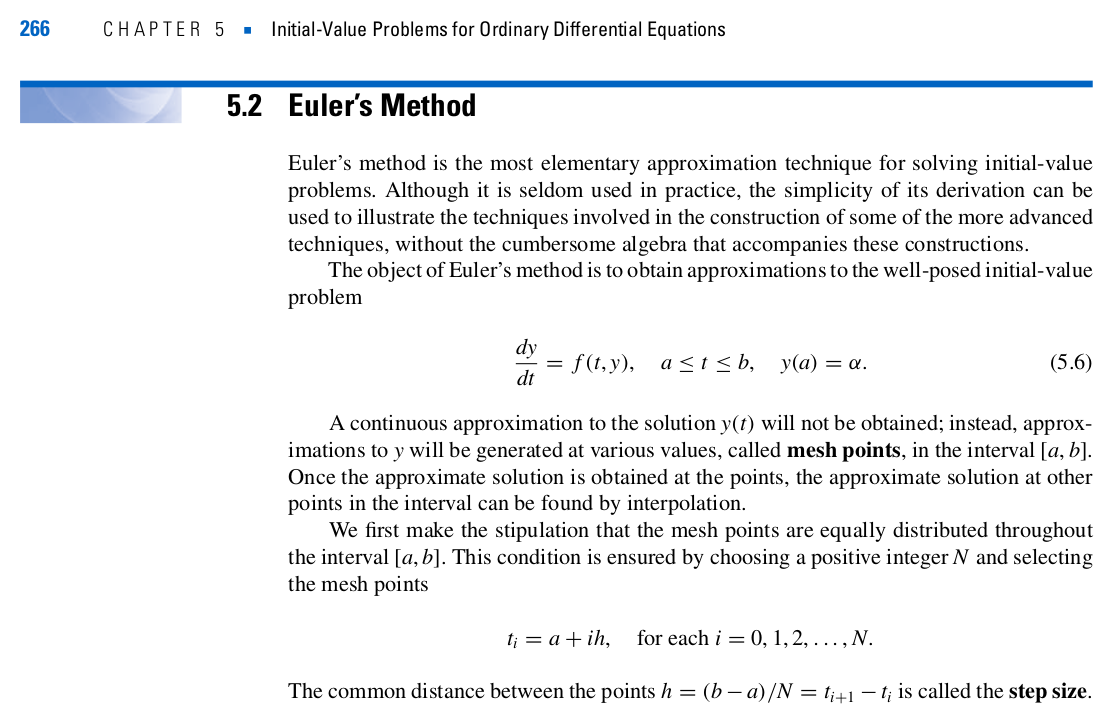

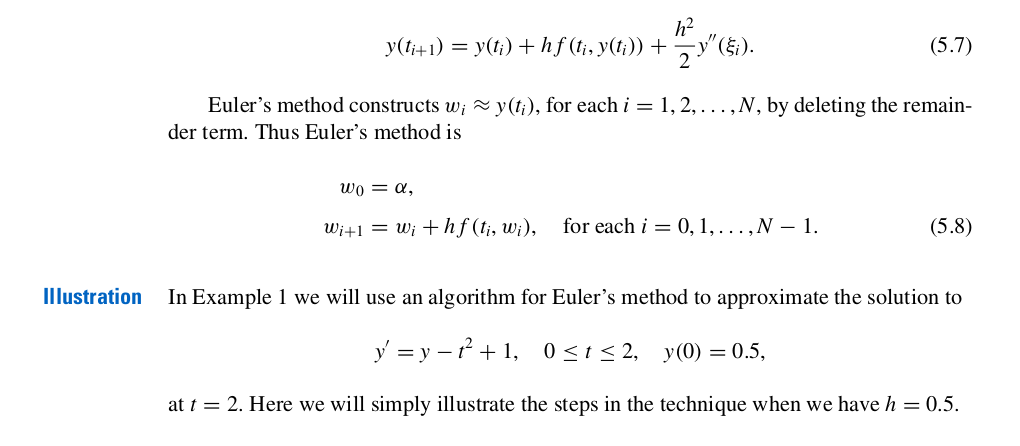

## Ejemplo Paso-Paso

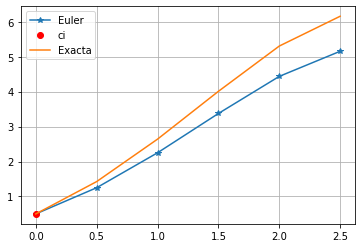

In [ ]:
#programacion de la funcion f(t,y)
def Ejemplo152_BFc5(t,y):
  """ Ejemplo de Burden y Faires
      capitulo 5 ed9
      Ejemplo 1 seccion 5.2
      pag. 268
  """
  
  dy = y - t**2 + 1
  return dy

##solucion exacta de la ED
Y_exacta = lambda t:(t+1)**2 - 0.5*np.exp(t)

## delta de tiempo
h = 0.5         #delta de tiempo
ti_euler = 0    #tiempo inicial
tf_euler = 2    #tiempofinal
yo_euler = 0.5  #Condicion inicia

##Inicializacion listas
T = [ti_euler]
Yt_euler = [yo_euler]

while T[-1] <= tf_euler:
  ti = T[-1] + h #Nuevo instante de tiempo
  yi = Yt_euler[-1] + h*Ejemplo152_BFc5(T[-1], Yt_euler[-1])#nuevo valor de y(t)
  T.append(ti) #actualizando T
  Yt_euler.append(yi)#actualizando y(t)

##Vectorizacion de listas
T = np.array(T)
Yt_euler = np.array(Yt_euler)

##Grafico de la solucion

plt.plot(T,Yt_euler,"*-")
plt.plot(T[0],yo_euler,"ro")##condicion inicial
plt.plot(T,Y_exacta(T)) #Solucion exacta
plt.legend(["Euler","ci","Exacta"])
plt.grid("on")
plt.show()


## Funcion Edo_Euler

In [ ]:
##funcion para comṕaracion
def Euler_odeint(Fun, y_ci,Tiempo):
  """Iguales argumentos a los de odeint
  """
  y_sol = [y_ci]
  for i,q in enumerate(Tiempo[:-1]):
    dt = Tiempo[i+1]-q
    yi = y_sol[-1] + dt*Fun(q,y_sol[-1])
    y_sol.append(yi)
  return y_sol



## Comparacion Soluciones

Usando odeint()

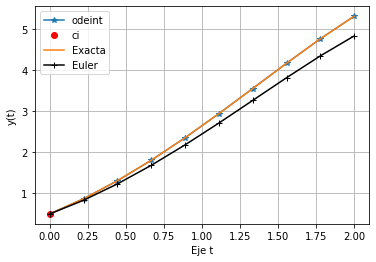

In [ ]:
#programacion funcion dy = f(t,y)
from scipy import integrate as IT

def Ejemplo152_BFc5(t,y):
  """ Ejemplo de Burden y Faires
      capitulo 5 ed9
      Ejemplo 1 seccion 5.2
      pag. 268
  """
  
  dy = y - t**2 + 1
  return dy

Y_exacta = lambda t:(t+1)**2 - 0.5*np.exp(t)

## solucion usando odeint
t_init = 0
t_final = 2

y_0 = 0.5

T_sol = np.linspace(t_init,t_final,10) #instantes de calculo

Y_sol = IT.odeint(Ejemplo152_BFc5,y_0,T_sol, tfirst=True)
                  #por defecto dy/dt = f(y,t) se asume la primer variable
                                          # como la dependiente
##Funcion con el metodo de Euler programado
Y_Euler = Euler_odeint(Ejemplo152_BFc5, y_0,T_sol)
##Grafico solucion

plt.plot(T_sol, Y_sol, "*-")
plt.plot(T_sol[0],y_0,"ro")##Condicion inicial
plt.plot(T_sol, Y_exacta(T_sol))## solucion exacta
plt.plot(T_sol, Y_Euler,"k+-")
plt.xlabel("Eje t")
plt.ylabel("y(t)")
plt.grid("on")
plt.legend(["odeint","ci","Exacta","Euler"])
plt.show()


# Metodos Runge-Kutta

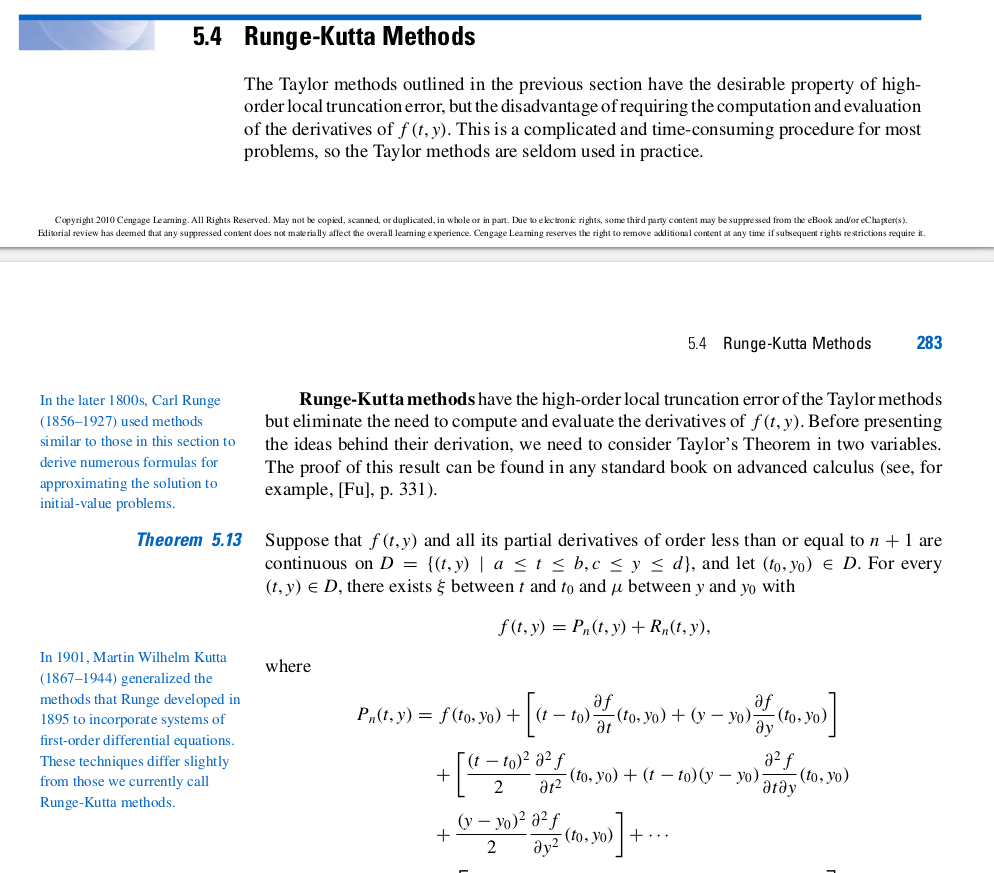

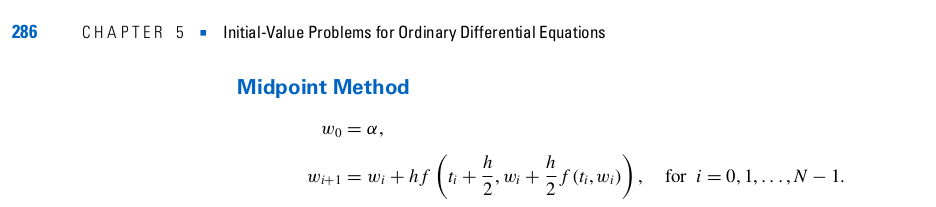

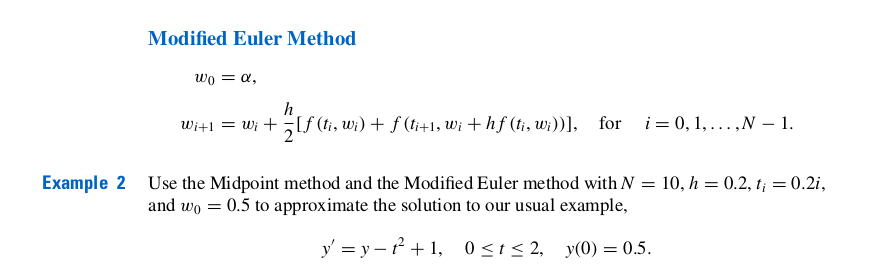

## Ejemplo Euler Modificado Paso-Paso

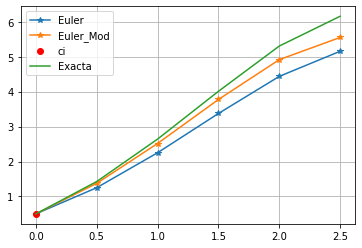

In [ ]:
#programacion de la funcion f(t,y)
def Ejemplo152_BFc5(t,y):
  """ Ejemplo de Burden y Faires
      capitulo 5 ed9
      Ejemplo 1 seccion 5.2
      pag. 268
  """
  
  dy = y - t**2 + 1
  return dy

##solucion exacta de la ED
Y_exacta = lambda t:(t+1)**2 - 0.5*np.exp(t)

## delta de tiempo
h = 0.5         #delta de tiempo
ti_euler = 0    #tiempo inicial
tf_euler = 2    #tiempofinal
yo_euler = 0.5  #Condicion inicia

##Inicializacion listas
T = [ti_euler]
Yt_euler = [yo_euler]
Yt_Emod = [yo_euler]

while T[-1] <= tf_euler:
  ti = T[-1] + h #Nuevo instante de tiempo
  ####Calculo metodo Euler
  yi = Yt_euler[-1] + h*Ejemplo152_BFc5(T[-1], Yt_euler[-1])#nuevo valor de y(t)
  ####Calculo metodo Euler Modificado
  k1 = Ejemplo152_BFc5(T[-1], Yt_Emod[-1])
  k2 = Ejemplo152_BFc5(ti, Yt_Emod[-1] + h*k1)
  yi_mod = Yt_Emod[-1] + (h/2)*(k1 + k2)
  ############################################
  T.append(ti) #actualizando T Euler
  Yt_euler.append(yi)#actualizando y(t) Euler
  Yt_Emod.append(yi_mod)#actualizacion Metodo Euler Modificado

##Vectorizacion de listas
T = np.array(T)
Yt_euler = np.array(Yt_euler)
Yt_mod = np.array(Yt_Emod)

##Grafico de la solucion

plt.plot(T,Yt_euler,"*-")
plt.plot(T,Yt_mod,"*-")
plt.plot(T[0],yo_euler,"ro")##condicion inicial
plt.plot(T,Y_exacta(T)) #Solucion exacta
plt.legend(["Euler","Euler_Mod","ci","Exacta"])
plt.grid("on")
plt.show()


##Runge-Kutta orden 4

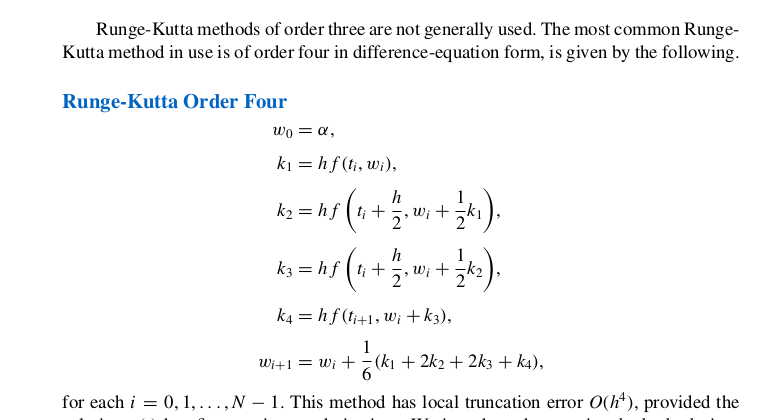

# Resultados y conclusiones

**Conclusiones:**



**Resultados:**

**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. ODE.](https://la.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/odes.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)





[scipy-integrate 1.8.1](https://docs.scipy.org/doc/scipy/tutorial/integrate.html)

[2017-marzo-15 Prezi](http://numericalmethodsie20152udea.blogspot.com/2017/03/interpolacion-ajuste-y-procesamieto-de.html)

[Guia Burden y Chapra](http://numericalmethodsie20152udea.blogspot.com/2017/03/documentacion-interpolacion-y-ajuste.html)

[2016-sep-14](http://numericalmethodsie20152udea.blogspot.com/2016/09/ajuste-de-funcion-no-lineal.html)

[2016-sep-7](http://numericalmethodsie20152udea.blogspot.com/2016/09/interpolacion-y-ajuste-de-datos.html)